In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import warnings
from pmdarima import auto_arima

In [4]:
# loading the data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Nat_Gas.csv")

Mounted at /content/drive


In [7]:
# Convert the date column to date time format
df["Dates"] = pd.to_datetime(df["Dates"])

<ipython-input-7-45a06c37a20b>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dates"] = pd.to_datetime(df["Dates"])


In [8]:
# Setting date column as index
df.set_index("Dates", inplace = True)

In [9]:
# display 5 rows
print(df.head())

            Prices
Dates             
2020-10-31    10.1
2020-11-30    10.3
2020-12-31    11.0
2021-01-31    10.9
2021-02-28    10.9


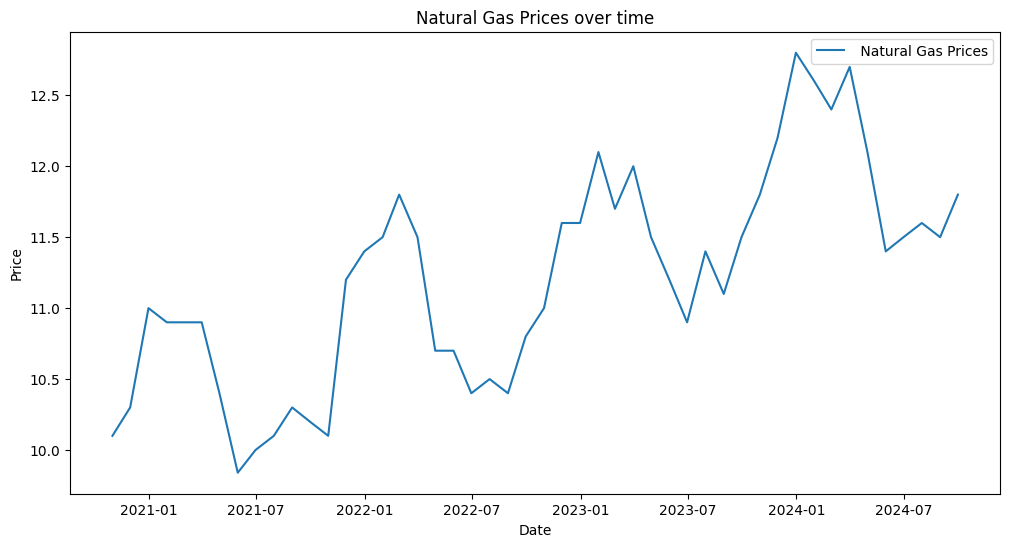

In [10]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df, label= " Natural Gas Prices")
plt.title("Natural Gas Prices over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [11]:
# Time series Model
model = auto_arima(df, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=37.147, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=48.334, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=38.394, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=42.336, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=46.741, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=39.069, Time=1.64 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=38.330, Time=2.63 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=36.109, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=53.197, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=53.566, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=53.701, Time=0.71 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=53.674, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=51.953, Ti

In [12]:
# Forecasting prices for next 1 months
forecast = model.predict(n_periods = 12)
forecast_index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_df = pd.DataFrame(forecast, index= forecast_index,columns =["Forecast"])

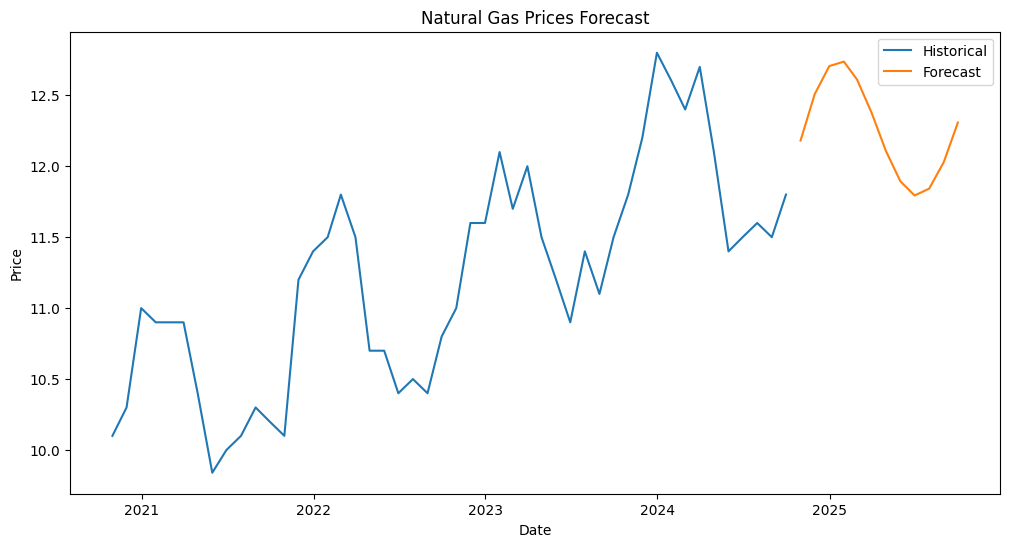

In [13]:
# Plotting the historical data along with the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Historical')
plt.plot(forecast_df, label='Forecast')
plt.title('Natural Gas Prices Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
# Estimating price for a given date
def estimate_price(date_str):
    date = pd.to_datetime(date_str)

    if date in df.index:
        return df.loc[date].values[0]
    elif date in forecast_df.index:
        return forecast_df.loc[date].values[0]
    else:
        # If the date is in between known historical data, interpolate
        if date < df.index[0]:
            return np.nan  # Date is out of historical data bounds
        return np.interp(date.toordinal(), df.index.to_series().map(pd.Timestamp.toordinal), df.values.flatten())

In [16]:
while True:
    user_input = input("Enter a date (YYYY-MM-DD) to estimate the natural gas price or 'exit' to quit: ")
    if user_input.lower() == 'exit':
        break
    try:
        estimated_price = estimate_price(user_input)
        if np.isnan(estimated_price):
            print(f"The date {user_input} is out of the historical data bounds.")
        else:
            print(f"The estimated price for {user_input} is {estimated_price:.2f}")
    except Exception as e:
        print(f"Invalid input or an error occurred: {e}")

Enter a date (YYYY-MM-DD) to estimate the natural gas price or 'exit' to quit: exit
